# **This is my analysis of San Diego's Transit Stop Locations**
I am going to attempt to analyze this JSON data 

In [5]:
print("Installing geopandas...")
!pip install geopandas
!pip install descartes
import geopandas as gpd

Installing geopandas...


In [20]:
print("Loading Shapefile...")
transit_routes = gpd.read_file('Transit_Routes_GTFS.zip')

Loading Shapefile...


In [21]:
# What type of data is this?
type(transit_routes)

geopandas.geodataframe.GeoDataFrame

In [52]:
# What are the first few rows?
transit_routes.sample(20)

,RouteShape,shape_id,route_id,agency_id,route_shor,route_long,route_desc,route_type,route_ty_1,route_url,route_colo,route_co_1,route_text,route_te_1,Shape_STLe,geometry
354,9_0_121_9,9_0_121,9,MTS,9,Old Town - Jewell & Garnet,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",28490.626399,"LINESTRING (6269675.193 1855621.495, 6269681.7..."
246,8_0_60_8,8_0_60,8,MTS,8,Old Town - Balboa Av TC,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",44311.545791,"LINESTRING (6269671.828 1855505.181, 6269695.3..."
159,704_1_71_704,704_1_71,704,MTS,704,E St Transit Center - Palomar Transit Center,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",19548.551821,"LINESTRING (6318285.039 1797318.503, 6318281.5..."
144,530_3_306_530,530_3_306,530,MTS,Green Line,Santee - 12th & Imperial,None,0,"Tram, Streetcar, Light rail",https://www.sdmts.com/schedules-real-time?frag...,009900,"(0, 153, 0)",FFFFFF,"(255, 255, 255)",71239.572344,"LINESTRING (6309320.164 1862094.847, 6309170.7..."
184,833_0_50_833,833_0_50,833,MTS,833,Santee Center - Parkway Plaza,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",39688.729868,"LINESTRING (6338704.678 1868687.226, 6338702.6..."
92,2_1_82_2,2_1_82,2,MTS,2,Downtown San Diego - 30th & Adams,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",30324.180449,"LINESTRING (6291081.064 1858386.375, 6291078.7..."
257,905_3_94_905,905_3_94,905,MTS,905,Iris Transit Center - Otay Mesa Transit Center,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",16733.492484,"LINESTRING (6326063.821 1786923.624, 6325883.5..."
298,936_1_54_936,936_1_54,936,MTS,936,Spring Valley - SDSU,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",43460.711435,"LINESTRING (6309141.755 1862079.696, 6309617.6..."
15,115_3_77_115,115_3_77,115,MTS,115,El Cajon T.C. - SDSU T.C.,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",58784.695863,"LINESTRING (6338706.107 1868848.404, 6338702.6..."
388,3080062_308,3080062,308,None,308,Escondido TC - Solana Beach,None,3,Bus,http://www.gonctd.com/breeze,008C9B,"(0, 140, 155)",FFFFFF,"(255, 255, 255)",100674.889426,"LINESTRING (6248272.216 1942166.053, 6248404.6..."


In [23]:
transit_routes.dtypes
transit_routes[

RouteShape      object
shape_id        object
route_id        object
agency_id       object
route_shor      object
route_long      object
route_desc      object
route_type       int64
route_ty_1      object
route_url       object
route_colo      object
route_co_1      object
route_text      object
route_te_1      object
Shape_STLe     float64
geometry      geometry
dtype: object

In [30]:
transit_stops = gpd.read_file('transit_stops_datasd.geojson')

In [31]:
type(transit_stops)

geopandas.geodataframe.GeoDataFrame

In [32]:
transit_stops.head()

,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,intersec,stop_place,parent_sta,lat,lng,geometry
0,1,MTS_10214,10214,10214,National Av & 40th St,32.696013,-117.108281,MTS,1,N-E/B,None,None,32.696008,-117.108269,POINT (-117.10827 32.69601)
1,2,MTS_10215,10215,10215,Carmel Mountain Rd & Freeport Rd,32.960686,-117.111006,MTS,1,M-Street-E/B,cmrfre,None,32.960681,-117.110994,POINT (-117.11099 32.96068)
2,3,MTS_10216,10216,10216,Imperial Av & 40th St,32.704755,-117.108782,MTS,2,M-Street-E/B,None,None,32.704751,-117.108771,POINT (-117.10877 32.70475)
3,4,MTS_10219,10219,10219,Home Av & Hixson Av,32.724346,-117.105247,MTS,1,N-E/B,None,None,32.724342,-117.105235,POINT (-117.10524 32.72434)
4,5,MTS_10220,10220,10220,National Av & 41st St,32.696025,-117.106175,MTS,1,N-E/B,None,None,32.696020,-117.106163,POINT (-117.10616 32.69602)


In [34]:
transit_stops.dtypes

objectid         int64
stop_uid        object
stop_id         object
stop_code        int64
stop_name       object
stop_lat       float64
stop_lon       float64
stop_agncy      object
wheelchair       int64
intersec        object
stop_place      object
parent_sta      object
lat            float64
lng            float64
geometry      geometry
dtype: object

In [35]:
transit_stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    6177 non-null   int64   
 1   stop_uid    6177 non-null   object  
 2   stop_id     6067 non-null   object  
 3   stop_code   6177 non-null   int64   
 4   stop_name   6177 non-null   object  
 5   stop_lat    6177 non-null   float64 
 6   stop_lon    6177 non-null   float64 
 7   stop_agncy  6177 non-null   object  
 8   wheelchair  6177 non-null   int64   
 9   intersec    5889 non-null   object  
 10  stop_place  1641 non-null   object  
 11  parent_sta  304 non-null    object  
 12  lat         6177 non-null   float64 
 13  lng         6177 non-null   float64 
 14  geometry    6177 non-null   geometry
dtypes: float64(4), geometry(1), int64(3), object(7)
memory usage: 724.0+ KB


In [36]:
transit_stops.sample(6)

,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,intersec,stop_place,parent_sta,lat,lng,geometry
3931,3932,MTS_98104,98104,98104,Hwy 94 & Forest Gate Rd,32.608203,-116.474046,MTS,2,N-N/B,campoP,None,32.608199,-116.474034,POINT (-116.47403 32.60820)
464,465,MTS_11414,11414,11414,Del Sol Bl & Ocean Bluffs,32.573962,-117.062800,MTS,1,M-Street-W/B,None,None,32.573957,-117.062788,POINT (-117.06279 32.57396)
4875,4876,NCTD_20833,20833,20833,Mesa Dr & Cottingham St,33.209113,-117.344787,NCTD,2,N-E/B,None,None,33.209108,-117.344775,POINT (-117.34478 33.20911)
2080,2081,MTS_23005,23005,23005,Miramar College Transit Station,32.912258,-117.119910,MTS,0,M-TC-Bus,mirsta,None,32.912253,-117.119898,POINT (-117.11990 32.91225)
3916,3917,MTS_98089,98089,98089,Lake Morena Dr & Molchan Dr (Country Market),32.679335,-116.505135,MTS,2,F-E/B,None,None,32.679330,-116.505123,POINT (-116.50512 32.67933)
4921,4922,NCTD_20933,20933,20933,S Mission Rd & Big Oak Ranch Rd,33.338494,-117.238281,NCTD,1,F-S/B,None,None,33.338489,-117.238269,POINT (-117.23827 33.33849)


In [37]:
transit_stops.shape

(6177, 15)

In [38]:
transit_stops.columns.to_list()

['objectid',
 'stop_uid',
 'stop_id',
 'stop_code',
 'stop_name',
 'stop_lat',
 'stop_lon',
 'stop_agncy',
 'wheelchair',
 'intersec',
 'stop_place',
 'parent_sta',
 'lat',
 'lng',
 'geometry']

In [51]:
transit_stops['stop_agncy'].sample(5)

883     MTS
3625    MTS
3050    MTS
3370    MTS
588     MTS
Name: stop_agncy, dtype: object

In [40]:
transit_routes.columns.to_list()

['RouteShape',
 'shape_id',
 'route_id',
 'agency_id',
 'route_shor',
 'route_long',
 'route_desc',
 'route_type',
 'route_ty_1',
 'route_url',
 'route_colo',
 'route_co_1',
 'route_text',
 'route_te_1',
 'Shape_STLe',
 'geometry']

In [43]:
transit_routes['route_ty_1'].sample(5)

215                            Bus
271                            Bus
77                             Bus
199                            Bus
124    Tram, Streetcar, Light rail
Name: route_ty_1, dtype: object

In [45]:
import pandas as pd

In [47]:
housing = pd.read_csv('Housing_Affordability.csv')

In [48]:
housing.info

<bound method DataFrame.info of                 Geography    GeoType  Data_Year  SoL_Housing_Income  \
0           Valley Center        SRA       2014               0.487   
1          Central Region     Region       2012               0.484   
2             East Region     Region       2012               0.516   
3    North Central Region     Region       2012               0.564   
4    North Coastal Region     Region       2012               0.525   
..                    ...        ...        ...                 ...   
319     City of San Diego  Municipal       2016               0.538   
320    City of San Marcos  Municipal       2016               0.490   
321        City of Santee  Municipal       2016               0.590   
322  City of Solana Beach  Municipal       2016               0.611   
323         City of Vista  Municipal       2016               0.465   

     DPAU_SoL_Housing_Income  
0                        0.5  
1                        0.5  
2                     

In [49]:
housing.columns.to_list()

['Geography',
 'GeoType',
 'Data_Year',
 'SoL_Housing_Income',
 'DPAU_SoL_Housing_Income']

In [94]:
housing.sample(30)

,Geography,GeoType,Data_Year,SoL_Housing_Income,DPAU_SoL_Housing_Income
208,North Inland Region,Region,2015,0.528,0.5
85,Supervisorial District 3,SupervisorDistrict,2013,0.519,0.5
64,Anza-Borrego Springs,SRA,2013,0.561,0.4
79,Sweetwater,SRA,2013,0.492,0.5
311,City of Encinitas,Municipal,2016,0.592,0.4
4,North Coastal Region,Region,2012,0.525,0.5
186,Jamul,SRA,2015,0.581,0.4
119,Mountain Empire,SRA,2014,0.617,0.4
143,Poway,SRA,2014,0.611,0.4
39,El Cajon,SRA,2013,0.467,0.5


In [53]:
transit_routes.info

<bound method DataFrame.info of         RouteShape   shape_id route_id agency_id route_shor  \
0     105_0_98_105   105_0_98      105       MTS        105   
1     105_0_99_105   105_0_99      105       MTS        105   
2    105_1_100_105  105_1_100      105       MTS        105   
3    105_1_101_105  105_1_101      105       MTS        105   
4     105_1_97_105   105_1_97      105       MTS        105   
..             ...        ...      ...       ...        ...   
456    3990006_399    3990006      399      None       None   
457    4440020_444    4440020      444      None        444   
458    4440021_444    4440021      444      None        444   
459    4450056_445    4450056      445      None        445   
460    4450057_445    4450057      445      None        445   

                                    route_long route_desc  route_type  \
0                   Old Town - University City       None           3   
1                   Old Town - University City       None        

In [54]:
transit_routes.sample(25)

,RouteShape,shape_id,route_id,agency_id,route_shor,route_long,route_desc,route_type,route_ty_1,route_url,route_colo,route_co_1,route_text,route_te_1,Shape_STLe,geometry
334,972_8_14_972,972_8_14,972,MTS,972,Sorrento Mesa Coaster Connection,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",34091.565651,"LINESTRING (6265111.687 1908631.154, 6265200.2..."
450,3950045_395,3950045,395,None,395,Oceanside TC - San Clemente,None,3,Bus,http://www.gonctd.com/breeze,008C9B,"(0, 140, 155)",FFFFFF,"(255, 255, 255)",128315.051712,"LINESTRING (6175943.353 2089285.185, 6176031.5..."
295,934_8_51_934,934_8_51,934,MTS,934,Iris TC Loop - Imperial Beach Clockwise,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",76680.873112,"LINESTRING (6310221.552 1788161.500, 6310297.7..."
380,3040079_304,3040079,304,None,304,Encinitas Station - Palomar College TC,None,3,Bus,http://www.gonctd.com/breeze,008C9B,"(0, 140, 155)",FFFFFF,"(255, 255, 255)",84194.250337,"LINESTRING (6242080.356 1961734.994, 6242053.7..."
212,856_0_112_856,856_0_112,856,MTS,856,SDSU - Cuyamaca College,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",73731.870559,"LINESTRING (6348846.000 1851167.258, 6348898.1..."
303,946_10_18_946,946_10_18,946,MTS,945A,Poway HS CC Loop,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",73327.333607,"LINESTRING (6313111.659 1951194.066, 6313121.6..."
332,968_3_46_968,968_3_46,968,MTS,968,8th St Transit Center - Plaza Bonita,None,3,Bus,https://www.sdmts.com/schedules-real-time?frag...,000099,"(0, 0, 153)",FFFFFF,"(255, 255, 255)",28535.309057,"LINESTRING (6311055.304 1819332.286, 6310838.7..."
377,3040076_304,3040076,304,None,304,Encinitas Station - Palomar College TC,None,3,Bus,http://www.gonctd.com/breeze,008C9B,"(0, 140, 155)",FFFFFF,"(255, 255, 255)",65125.574439,"LINESTRING (6275275.348 1998623.279, 6275077.4..."
418,3320067_332,3320067,332,None,332,VTC - Buena Creek Station,None,3,Bus,http://www.gonctd.com/breeze,008C9B,"(0, 140, 155)",FFFFFF,"(255, 255, 255)",57222.292070,"LINESTRING (6257219.716 2018947.034, 6257089.1..."
426,3510047_351,3510047,351,None,351,Escondido Circulator (CCW),None,3,Bus,http://www.gonctd.com/breeze,008C9B,"(0, 140, 155)",FFFFFF,"(255, 255, 255)",45517.158102,"LINESTRING (6304123.715 1987920.695, 6304133.1..."


In [57]:
route_type = transit_routes['route_ty_1'].value_counts()
route_type

Bus                            432
Tram, Streetcar, Light rail     27
Rail                             2
Name: route_ty_1, dtype: int64

In [59]:
route_type = route_type.reset_index()
route_type

,level_0,index,route_ty_1
0,0,Bus,432
1,1,"Tram, Streetcar, Light rail",27
2,2,Rail,2


In [60]:
type(route_type)

pandas.core.frame.DataFrame

In [61]:
route_type.columns.to_list()

['level_0', 'index', 'route_ty_1']

In [62]:
route_type.columns = ['level', 'type', 'count']
route_type

,level,type,count
0,0,Bus,432
1,1,"Tram, Streetcar, Light rail",27
2,2,Rail,2


<AxesSubplot:title={'center':'Number of Transportation Types'}, xlabel='type'>

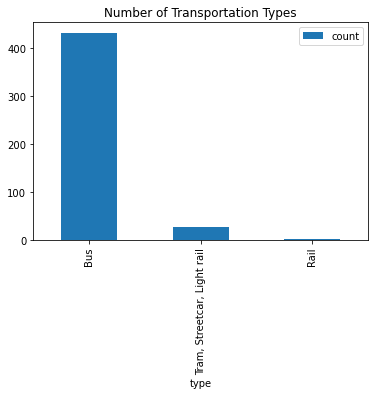

In [64]:
route_type.plot.bar(x = 'type', y = 'count', title = 'Number of Transportation Types')

In [66]:
# Now I am going to trim the data to focus on Tram, Streetcar, and Lightrail
# First, I'm going to look at what I'm working with by going back to the main dataset
transit_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RouteShape  461 non-null    object  
 1   shape_id    461 non-null    object  
 2   route_id    461 non-null    object  
 3   agency_id   360 non-null    object  
 4   route_shor  455 non-null    object  
 5   route_long  461 non-null    object  
 6   route_desc  0 non-null      object  
 7   route_type  461 non-null    int64   
 8   route_ty_1  461 non-null    object  
 9   route_url   461 non-null    object  
 10  route_colo  461 non-null    object  
 11  route_co_1  461 non-null    object  
 12  route_text  461 non-null    object  
 13  route_te_1  461 non-null    object  
 14  Shape_STLe  461 non-null    float64 
 15  geometry    461 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(13)
memory usage: 57.8+ KB


In [67]:
transit_routes[['route_shor', 'agency_id', 'route_ty_1', 'geometry']]

,route_shor,agency_id,route_ty_1,geometry
0,105,MTS,Bus,"LINESTRING (6269836.015 1855690.984, 6269859.6..."
1,105,MTS,Bus,"LINESTRING (6269836.015 1855690.984, 6269859.6..."
2,105,MTS,Bus,"LINESTRING (6267964.493 1882683.325, 6267968.7..."
3,105,MTS,Bus,"LINESTRING (6269482.011 1876275.307, 6269479.7..."
4,105,MTS,Bus,"LINESTRING (6265726.464 1897368.293, 6265733.3..."
...,...,...,...,...
456,None,None,"Tram, Streetcar, Light rail","LINESTRING (6257399.678 2018860.534, 6257568.6..."
457,444,None,Bus,"LINESTRING (6234411.680 1985174.689, 6234452.6..."
458,444,None,Bus,"LINESTRING (6235261.424 1991040.138, 6235203.5..."
459,445,None,Bus,"LINESTRING (6275147.800 1998667.725, 6275077.4..."


In [70]:
desired_columns = ['route_shor', 'agency_id', 'route_ty_1', 'geometry']
transit_routes[desired_columns].sample(5)

,route_shor,agency_id,route_ty_1,geometry
152,701,MTS,Bus,"LINESTRING (6304562.726 1800263.544, 6304604.3..."
70,235,MTS,Bus,"LINESTRING (6279506.719 1842558.175, 6279504.5..."
4,105,MTS,Bus,"LINESTRING (6265726.464 1897368.293, 6265733.3..."
337,973,MTS,Bus,"LINESTRING (6262441.555 1909626.067, 6262520.5..."
31,12,MTS,Bus,"LINESTRING (6321762.322 1833901.542, 6321712.0..."


In [71]:
routes_trimmed = transit_routes[desired_columns].copy()

In [72]:
routes_trimmed


,route_shor,agency_id,route_ty_1,geometry
0,105,MTS,Bus,"LINESTRING (6269836.015 1855690.984, 6269859.6..."
1,105,MTS,Bus,"LINESTRING (6269836.015 1855690.984, 6269859.6..."
2,105,MTS,Bus,"LINESTRING (6267964.493 1882683.325, 6267968.7..."
3,105,MTS,Bus,"LINESTRING (6269482.011 1876275.307, 6269479.7..."
4,105,MTS,Bus,"LINESTRING (6265726.464 1897368.293, 6265733.3..."
...,...,...,...,...
456,None,None,"Tram, Streetcar, Light rail","LINESTRING (6257399.678 2018860.534, 6257568.6..."
457,444,None,Bus,"LINESTRING (6234411.680 1985174.689, 6234452.6..."
458,444,None,Bus,"LINESTRING (6235261.424 1991040.138, 6235203.5..."
459,445,None,Bus,"LINESTRING (6275147.800 1998667.725, 6275077.4..."


In [86]:
# now I just want to focus on the light rail, streetcar, tram lines
routes_trimmed[routes_trimmed.route_ty_1 == 'Tram, Streetcar, Light rail']
tsl_r = routes_trimmed[routes_trimmed.route_ty_1 == 'Tram, Streetcar, Light rail']
tsl_r

,route_shor,agency_id,route_ty_1,geometry
121,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6321470.088 1778756.968, 6321384.7..."
122,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6321470.088 1778756.968, 6321384.7..."
123,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6321470.088 1778756.968, 6321384.7..."
124,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6283825.576 1837765.901, 6283746.7..."
125,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6309890.476 1788061.121, 6306799.6..."
126,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6278753.584 1842052.131, 6278750.5..."
127,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6279117.464 1841789.944, 6279221.7..."
128,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6285842.716 1834938.032, 6286008.5..."
129,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6265453.453 1874317.250, 6265768.0..."
130,UC San Diego Blue Line,MTS,"Tram, Streetcar, Light rail","LINESTRING (6265665.646 1897399.419, 6265676.2..."


<AxesSubplot:>

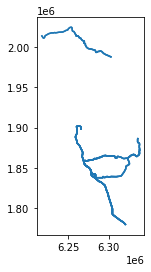

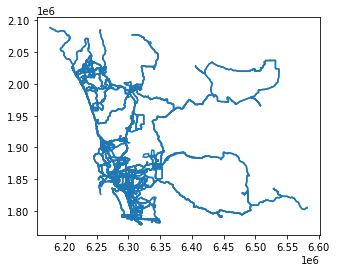

In [81]:
# Now let's see if I can turn this into some type of visual
tsl.plot()
routes_trimmed.plot()


In [75]:
routes_trimmed.geometry

0      LINESTRING (6269836.015 1855690.984, 6269859.6...
1      LINESTRING (6269836.015 1855690.984, 6269859.6...
2      LINESTRING (6267964.493 1882683.325, 6267968.7...
3      LINESTRING (6269482.011 1876275.307, 6269479.7...
4      LINESTRING (6265726.464 1897368.293, 6265733.3...
                             ...                        
456    LINESTRING (6257399.678 2018860.534, 6257568.6...
457    LINESTRING (6234411.680 1985174.689, 6234452.6...
458    LINESTRING (6235261.424 1991040.138, 6235203.5...
459    LINESTRING (6275147.800 1998667.725, 6275077.4...
460    LINESTRING (6234411.680 1985174.689, 6234452.6...
Name: geometry, Length: 461, dtype: geometry

<AxesSubplot:>

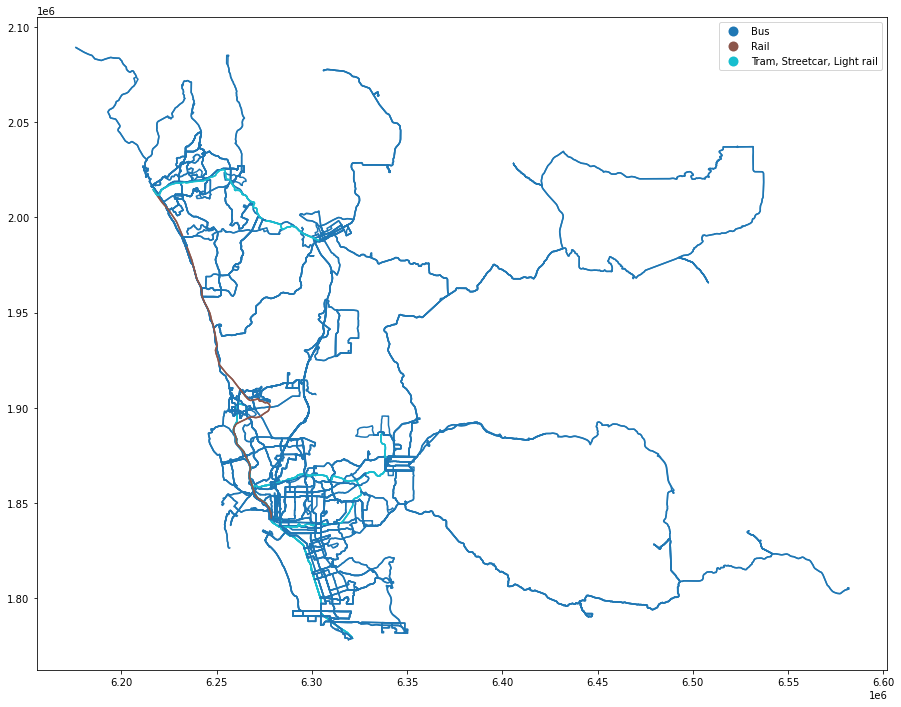

In [82]:
routes_trimmed.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'route_ty_1',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [2]:
$ git pull origin up206A-Nicole

SyntaxError: invalid syntax (4214683369.py, line 1)